# 1. Check Eligibility of the Customer given Input

In [38]:
from warnings import filterwarnings
filterwarnings("ignore")

# Read File

In [39]:
from pandas import read_csv
A = read_csv("C://Users/Kallesh/OneDrive/Desktop/Training_sets.csv")

In [40]:
A.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y


# Missing Data Treatment

In [41]:
A.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
for i in A.columns:
    if(A[i].dtypes=="object"):
        x = A[i].mode()[0]
        A[i]=A[i].fillna(x)
    else:
        x = A[i].mean()
        A[i]=A[i].fillna(x)

In [43]:
A.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Delete Unnecessary Columns

In [44]:
A = A.drop(labels=["Loan_ID"],axis=1)   
A.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,1.0,Urban,Y


# Delete Special Symbols from data

In [45]:
for i in A.columns:
    print("\n",A[i].value_counts())



 Male      502
Female    112
Name: Gender, dtype: int64

 Yes    401
No     213
Name: Married, dtype: int64

 0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

 Graduate        480
Not Graduate    134
Name: Education, dtype: int64

 No     532
Yes     82
Name: Self_Employed, dtype: int64

 2500.0    9
2600.0    6
6000.0    6
3750.0    5
5000.0    5
         ..
6133.0    1
2058.0    1
2787.0    1
6256.0    1
5829.0    1
Name: ApplicantIncome, Length: 505, dtype: int64

 0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
3447.0      1
688.0       1
2669.0      1
189.0       1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64

 146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
211.000000     1
250.000000     1
62.000000      1
85.000000      1
436.000000     1
Name: LoanAmount, Length: 204, dtype: int64

 360.0    512
180.0     44
480.0     15
342.0     14
300.0     1

In [46]:
def spe_sym_removal(df):
    raw_dep = []
    for i in df.Dependents:
        i = i.replace("+","")
        raw_dep.append(i)
    
    return raw_dep

In [47]:
new_dep = spe_sym_removal(A)

In [48]:
A[["Dependents"]] = new_dep

In [49]:
A.Dependents.value_counts()


0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

# Declare X and Y

In [50]:
Y = A[["Loan_Status"]]
X = A.drop(labels=["Loan_Status"],axis=1)

# EDA

1) Univariate

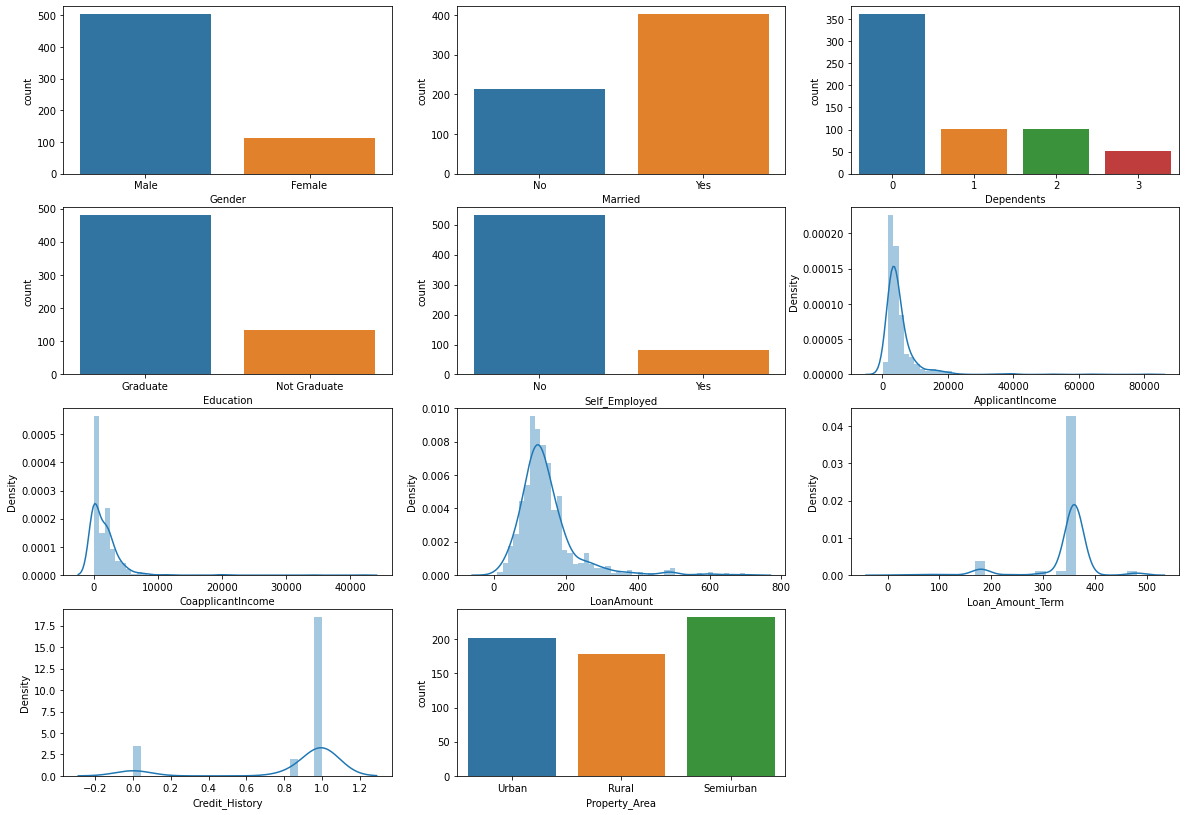

In [51]:
import seaborn as sb
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.countplot(X[i])
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.distplot(X[i])
        q = q + 1

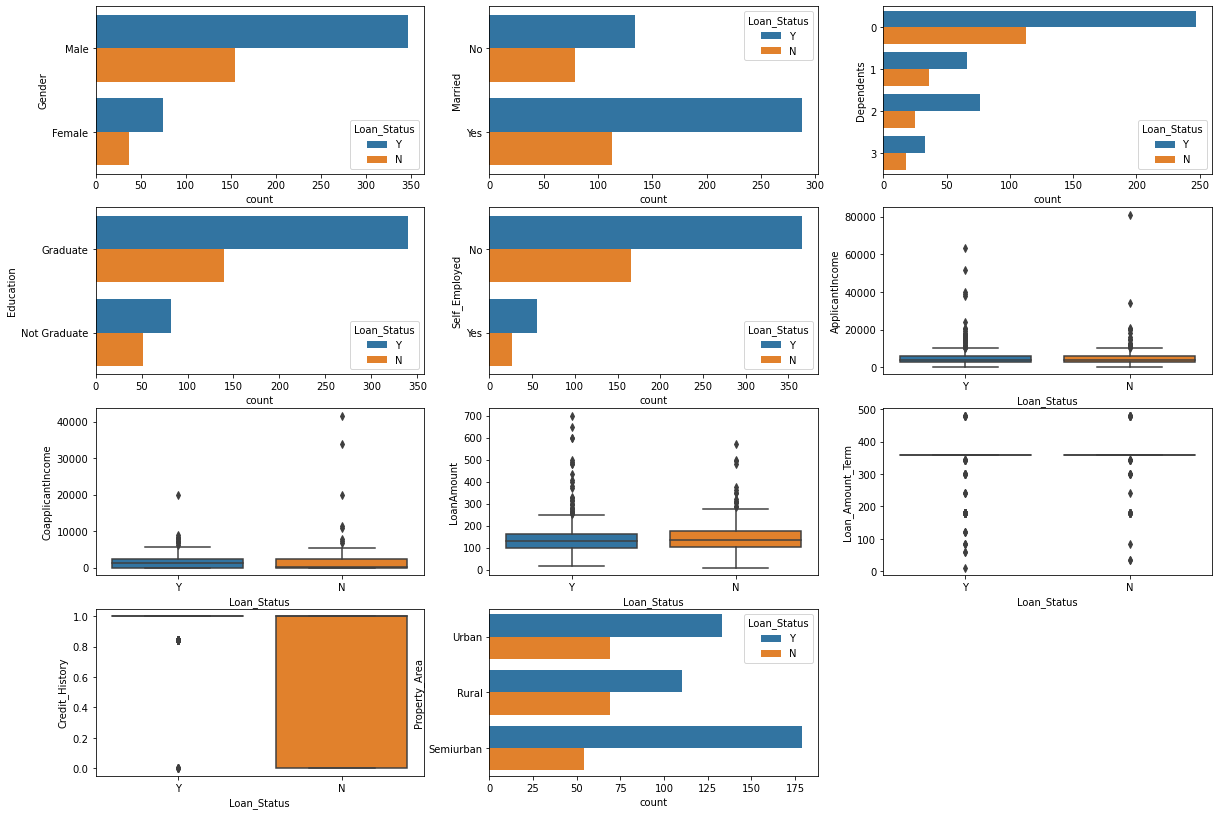

In [52]:
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.countplot(y=X[i],hue=Y.Loan_Status)
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.boxplot(Y.Loan_Status,X[i])
        q = q + 1

# Data Preprocessing

In [53]:
cat=[]
con=[]

for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)
    
        

In [54]:
X[con].skew()


ApplicantIncome      6.538870
CoapplicantIncome    7.492000
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

In [55]:
from numpy import log, sqrt
X.CoapplicantIncome = sqrt(X.CoapplicantIncome)
X.ApplicantIncome = log(X.ApplicantIncome)
X.LoanAmount = log(X.LoanAmount)

In [56]:
X[con].skew()

ApplicantIncome      0.477562
CoapplicantIncome    0.980113
LoanAmount          -0.223227
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

# Preprocessing

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xcon = pd.DataFrame(ss.fit_transform(X[con]),columns = con)
Xcat = pd.get_dummies(X[cat])

In [58]:
Xcat

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [59]:
Xcon

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.515465,-0.968030,0.250640,0.279851,0.451640
1,0.393196,0.374420,-0.020226,0.279851,0.451640
2,-0.519896,-0.968030,-1.355202,0.279851,0.451640
3,-0.751980,0.710655,-0.150299,0.279851,0.451640
4,0.554992,-0.968030,0.174727,0.279851,0.451640
...,...,...,...,...,...
609,-0.572468,-0.968030,-1.208025,0.279851,0.451640
610,-0.033218,-0.968030,-2.364484,-2.518655,0.451640
611,1.015004,-0.432476,1.353011,0.279851,0.451640
612,0.918095,-0.968030,0.743783,0.279851,0.451640


In [60]:
X = Xcat.join(X[con])

In [61]:
X

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,8.674026,0.000000,4.986426,360.0,1.0
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,8.595180,38.832976,4.852030,360.0,1.0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1,7.856707,48.559242,4.787492,360.0,1.0
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1,8.699515,0.000000,4.948760,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,7.972466,0.000000,4.262680,360.0,1.0
610,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0,8.320205,0.000000,3.688879,180.0,1.0
611,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,8.996157,15.491933,5.533389,360.0,1.0
612,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,8.933664,0.000000,5.231109,360.0,1.0


In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y.Loan_Status = le.fit_transform(Y)
from warnings import filterwarnings
filterwarnings("ignore")

In [63]:
Y.head(3)

,Loan_Status
0,1
1,0
2,1


# Divide X and Y into training and testing

In [64]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=32)

# Creating ML Models and choose one of the best

# 1) Logistic Classifier Model

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_model = lr.fit(xtrain,ytrain)

# Calculating train and test error

In [66]:
from sklearn.metrics import accuracy_score

pred_tr_lrmodel = lr_model.predict(xtrain)
acc_tr_lrmodel = round(accuracy_score(ytrain,pred_tr_lrmodel),4)
print("Logistic Model Train Accuracy: ",acc_tr_lrmodel)

pred_ts_lrmodel = lr_model.predict(xtest)
acc_ts_lrmodel = round(accuracy_score(ytest,pred_ts_lrmodel),4)
print("Logistic Model Test Accuracy: ",acc_ts_lrmodel)

Logistic Model Train Accuracy:  0.8147
Logistic Model Test Accuracy:  0.7886


# 2) Naive Bayes Model

In [67]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb_model = nb.fit(xtrain,ytrain)

# Calculating train and test error

In [68]:
pred_tr_nbmodel = nb_model.predict(xtrain)
acc_tr_nbmodel = round(accuracy_score(ytrain,pred_tr_nbmodel),4)
print("Naive Bayes Model Train Accuracy : ",acc_tr_nbmodel)

pred_ts_nbmodel = nb_model.predict(xtest)
acc_ts_nbmodel = round(accuracy_score(ytest,pred_ts_nbmodel),4)
print("Naive Bayes Model Test Accuracy: ",acc_ts_nbmodel)

Naive Bayes Model Train Accuracy :  0.8106
Naive Bayes Model Test Accuracy:  0.7886


# 3) Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

dtr_model = DecisionTreeClassifier(random_state=32)
model = dtr_model.fit(xtrain,ytrain)


# Calculating train and test error


In [71]:
pred_tr_dtrmodel = model.predict(xtrain)
acc_tr_dtrmodel = round(accuracy_score(ytrain,pred_tr_dtrmodel),4)
print("Decision Tree Model Train Accuracy: ",acc_tr_dtrmodel)

pred_ts_dtrmodel = model.predict(xtest)
acc_ts_dtrmodel = round(accuracy_score(ytest,pred_ts_dtrmodel),4)
print("Decision Tree Model Test Accuracy: ",acc_ts_dtrmodel)

Decision Tree Model Train Accuracy:  1.0
Decision Tree Model Test Accuracy:  0.748


# 4) Random Forest Model
Finding best value for n Estimators, max depth using GridSearchCV

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

tg = {"max_depth":range(2,15,1),"n_estimators":range(2,15,1)}
rfr = RandomForestClassifier(random_state=21)
cv = GridSearchCV(rfr,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 5, 'n_estimators': 13}

# Creating Random Forest Model

In [73]:
rfr2 = RandomForestClassifier(n_estimators=4, random_state=21, max_depth=2)
model_rfr = rfr2.fit(xtrain,ytrain)

# Calculating train and test error

In [75]:
pred_tr_rfrmodel = model_rfr.predict(xtrain)
acc_tr_rfrmodel = round(accuracy_score(ytrain,pred_tr_rfrmodel),4)
print("Random Forest Model Train Accuracy: ",acc_tr_rfrmodel)

pred_ts_rfrmodel = model_rfr.predict(xtest)
acc_ts_rfrmodel = round(accuracy_score(ytest,pred_ts_rfrmodel),4)
print("Decision Tree Model Test Accuracy: ",acc_ts_rfrmodel)

Random Forest Model Train Accuracy:  0.7312
Decision Tree Model Test Accuracy:  0.6829


# 5) Adaboost Model
Finding best value for n Estimators, max depth using GridSearchCV

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tg = {"n_estimators":range(2,15,1)}
abm = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),random_state=21)
cv = GridSearchCV(abm,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 2}

# Creating Adaboost Model

In [77]:
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=21,max_depth=2),n_estimators=2,random_state=21)
model_abm = boost.fit(xtrain,ytrain)

# Calculating train and test error

In [78]:
pred_tr_abmmodel = model_abm.predict(xtrain)
acc_tr_abmmodel = round(accuracy_score(ytrain,pred_tr_abmmodel),4)
print("Adaboost Model Train Accuracy: ",acc_tr_abmmodel)

pred_ts_abmmodel = model_abm.predict(xtest)
acc_ts_abmmodel = round(accuracy_score(ytest,pred_ts_abmmodel),4)
print("Adaboost Model Test Accuracy: ",acc_ts_abmmodel)

Adaboost Model Train Accuracy:  0.8228
Adaboost Model Test Accuracy:  0.7805


# 6) KNN Model
Finding best value for n neighbors using GridSearchCV

In [80]:
from sklearn.neighbors import KNeighborsClassifier

tg = {"n_neighbors":range(2,15,1)}
knn = KNeighborsClassifier()
cv = GridSearchCV(knn,tg,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_neighbors': 13}

# Creating KNN Model

In [82]:
kn = KNeighborsClassifier(n_neighbors=13)
knn_model = kn.fit(xtrain,ytrain)

# Calculating train and test error

In [84]:
pred_tr_knnmodel = knn_model.predict(xtrain)
acc_tr_knnmodel = round(accuracy_score(ytrain,pred_tr_knnmodel),4)
print("KNN Model Train Accuracy: ",acc_tr_knnmodel)

pred_ts_knnmodel = knn_model.predict(xtest)
acc_ts_knnmodel = round(accuracy_score(ytest,pred_ts_knnmodel),4)
print("KNN Model Test Accuracy: ",acc_ts_nbmodel)

KNN Model Train Accuracy:  0.7108
KNN Model Test Accuracy:  0.7886


# Naive Bayes Model is the best among all models
Train Naive Bayes Model overall trainning data

In [85]:
nb1 = GaussianNB()
model  = nb1.fit(X,Y)

# Prepare testing data same as training data

In [158]:
from pandas import read_csv
B = read_csv("C://Users/Kallesh/OneDrive/Desktop/testing_sets.csv")

In [159]:
B.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [160]:
B = B.drop(labels=["Loan_ID"],axis=1)

In [161]:
from miss import replacer,preprocessing
replacer(B)

In [162]:
new_dep_B = []
new_dep_B = spe_sym_removal(B)
B[["Dependents"]] = new_dep_B

In [163]:
cat=[]
con=[]

for i in B.columns:
    if(B[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [164]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [165]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xcon = pd.DataFrame(ss.fit_transform(B[con]),columns = con)
Xcat = pd.get_dummies(B[cat])

In [166]:
B1 = Xcat.join(X[con])

In [167]:
B1

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,8.674026,0.000000,4.986426,360.0,1.000000
1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,8.595180,38.832976,4.852030,360.0,1.000000
2,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,8.006368,0.000000,4.189655,360.0,1.000000
3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,7.856707,48.559242,4.787492,360.0,1.000000
4,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,8.699515,0.000000,4.948760,360.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,8.465900,48.301139,4.867534,360.0,1.000000
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,8.010692,55.072679,4.553877,300.0,0.842199
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0,8.827908,0.000000,4.948760,360.0,1.000000
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,8.734882,0.000000,4.890349,360.0,1.000000


# Predicting Loan Status

In [195]:
predicted_LoanStatus = model.predict(B1)

In [196]:
Loan_Status = le.inverse_transform(predicted_LoanStatus)

In [197]:
B[["Loan_Status"]] = Loan_Status

In [198]:
B.Loan_Status.value_counts()

Y    316
N     51
Name: Loan_Status, dtype: int64

In [199]:
B.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.00,Urban,Y
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.00,Urban,Y
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.00,Urban,Y
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0.83,Urban,Y
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.00,Urban,Y


# 2.Identify customer segments from given data and categorize customer into one of the segments.

In [213]:
clust_train = A.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

# Data Preprocessing

In [214]:
def cat_con_sep(df):
    cat = []
    con = []
    for i in df.columns:
        if df[i].dtype == "object":
            cat.append(i)
        
        else:
            con.append(i)
            
    
    return cat,con

In [215]:
cat, con = cat_con_sep(clust_train)

In [216]:
from sklearn.preprocessing import StandardScaler
def preprocessing_data(df,cat,con):
    ss = StandardScaler()
    df1 = pd.get_dummies(df[cat])
    df2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    df3 = df2.join(df1)
    return df3

In [217]:
clust_train = preprocessing_data(clust_train,cat,con)

# Applying for loop and making Elbow curve for getting best K cluster value

In [218]:
from sklearn.cluster import KMeans

WCSS = []
K = range(2,20,1)
for i in K:
    km = KMeans(n_clusters=i)
    model_ser = km.fit(clust_train)
    WCSS.append(model_ser.inertia_)

In [219]:
WCSS

[2820.267473250377,
 2465.5670268057333,
 2168.5895548026674,
 1819.4129385625274,
 1697.4919326538125,
 1602.4982278217774,
 1500.7097376271379,
 1448.3968527186823,
 1368.9878529948862,
 1321.9075563642382,
 1269.351681790662,
 1231.7442098956933,
 1201.72418892885,
 1137.405509696783,
 1111.4987533605977,
 1091.9739818309338,
 1057.3813273153655,
 1029.7419795658698]

Text(0.5, 1.0, 'Elbow curve Data')

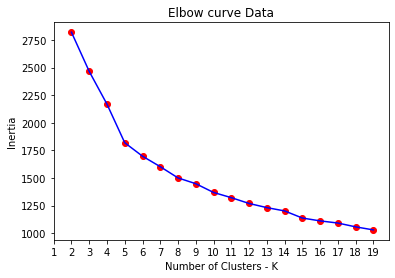

In [220]:
import matplotlib.pyplot as plt

plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="blue")
plt.xlabel("Number of Clusters - K")
plt.ylabel("Inertia")
plt.xticks(range(1,20,1))
plt.title("Elbow curve Data")

# Create model with best K value

In [222]:
km = KMeans(n_clusters=5)
model_clust = km.fit(clust_train) 


# Prepare test data as same as train data

In [223]:
test_data_clst = B.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

In [225]:
cat, con  = cat_con_sep(test_data_clst)

In [226]:
test_data_clst = preprocessing_data(test_data_clst,cat,con)

# Predict clusters of data

In [228]:
cluster = model_clust.predict(test_data_clst)

In [229]:
cluster

array([1, 1, 1, 1, 4, 1, 4, 0, 1, 4, 4, 1, 4, 0, 4, 4, 1, 1, 1, 4, 1, 4,
       4, 4, 1, 2, 1, 1, 1, 4, 4, 1, 4, 1, 1, 0, 1, 1, 4, 4, 1, 4, 1, 4,
       4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 0, 4, 1, 0, 1, 1, 1, 4, 0, 1, 1,
       0, 0, 1, 0, 4, 4, 1, 1, 1, 4, 1, 4, 1, 1, 0, 3, 0, 1, 0, 1, 1, 4,
       4, 4, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 4, 0, 1, 1, 4, 1, 0, 1, 1, 1,
       4, 1, 4, 1, 1, 4, 4, 0, 0, 0, 4, 1, 1, 0, 0, 4, 0, 1, 4, 1, 1, 4,
       1, 4, 4, 1, 1, 1, 4, 4, 0, 1, 0, 3, 1, 4, 4, 0, 1, 4, 4, 1, 4, 0,
       1, 4, 1, 1, 4, 1, 4, 0, 4, 4, 4, 0, 0, 1, 0, 1, 4, 1, 1, 0, 0, 1,
       1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 0, 0, 1, 4, 0, 1,
       0, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 4, 0, 1, 4, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 0, 4, 1, 1, 4, 0, 2, 4, 1, 4, 1, 0, 0, 2, 1, 4, 4, 0,
       1, 0, 4, 0, 1, 1, 1, 4, 0, 1, 4, 1, 1, 0, 1, 1, 1, 4, 1, 1, 4, 1,
       1, 4, 0, 4, 0, 4, 1, 4, 3, 0, 0, 1, 1, 4, 0, 3, 4, 1, 4, 4, 1, 1,
       1, 4, 4, 1, 1, 1, 4, 0, 1, 1, 4, 4, 1, 1, 1,

In [230]:
E = B.drop(labels=["LoanAmount","Loan_Amount_Term","Loan_Status"],axis=1)

In [231]:
E["Cluster"] = cluster

In [232]:
E.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Cluster
0,Male,Yes,0,Graduate,No,5720,0,1.00,Urban,1
1,Male,Yes,1,Graduate,No,3076,1500,1.00,Urban,1
2,Male,Yes,2,Graduate,No,5000,1800,1.00,Urban,1
3,Male,Yes,2,Graduate,No,2340,2546,0.83,Urban,1
4,Male,No,0,Not Graduate,No,3276,0,1.00,Urban,4


In [233]:
E.groupby(by="Cluster")["Cluster"].count()

Cluster
0     58
1    195
2      4
3      4
4    106
Name: Cluster, dtype: int64

In [234]:
cls_name = { 
    0:"Good Credit History",
    1:"Good Income and Credit history",
    2:"Bad Credit History",
    3:"Highest Coapplicant Income",
    4:"Highest Applicant Income"
}

In [235]:
tag_clu = []
for i in E.Cluster:
    tag_clu.append(cls_name[i])
    
E["Customer Segmentation"] = tag_clu

In [236]:
E.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Credit_History,Property_Area,Cluster,Customer Segmentation
0,Male,Yes,0,Graduate,No,5720,0,1.00,Urban,1,Good Income and Credit history
1,Male,Yes,1,Graduate,No,3076,1500,1.00,Urban,1,Good Income and Credit history
2,Male,Yes,2,Graduate,No,5000,1800,1.00,Urban,1,Good Income and Credit history
3,Male,Yes,2,Graduate,No,2340,2546,0.83,Urban,1,Good Income and Credit history
4,Male,No,0,Not Graduate,No,3276,0,1.00,Urban,4,Highest Applicant Income


# 2. If customer is not eligible for the input required amount and duration:
a. what can be amount for the given duration.
Get data which have Loan_Status is yes

In [237]:
train_data1 = A[A["Loan_Status"]=="Y"]


# Indexing properly


In [238]:
len_train_data1 = train_data1.shape[0]
train_data1.index = range(0,len_train_data1,1)


# Remove Unwanted column


In [239]:
train_data1 = train_data1.drop(labels="Loan_Status",axis=1)


# Declare X and Y


In [241]:
X = train_data1.drop(labels="LoanAmount",axis=1)
Y = train_data1[["LoanAmount"]]


# EDA
1)Unvariant

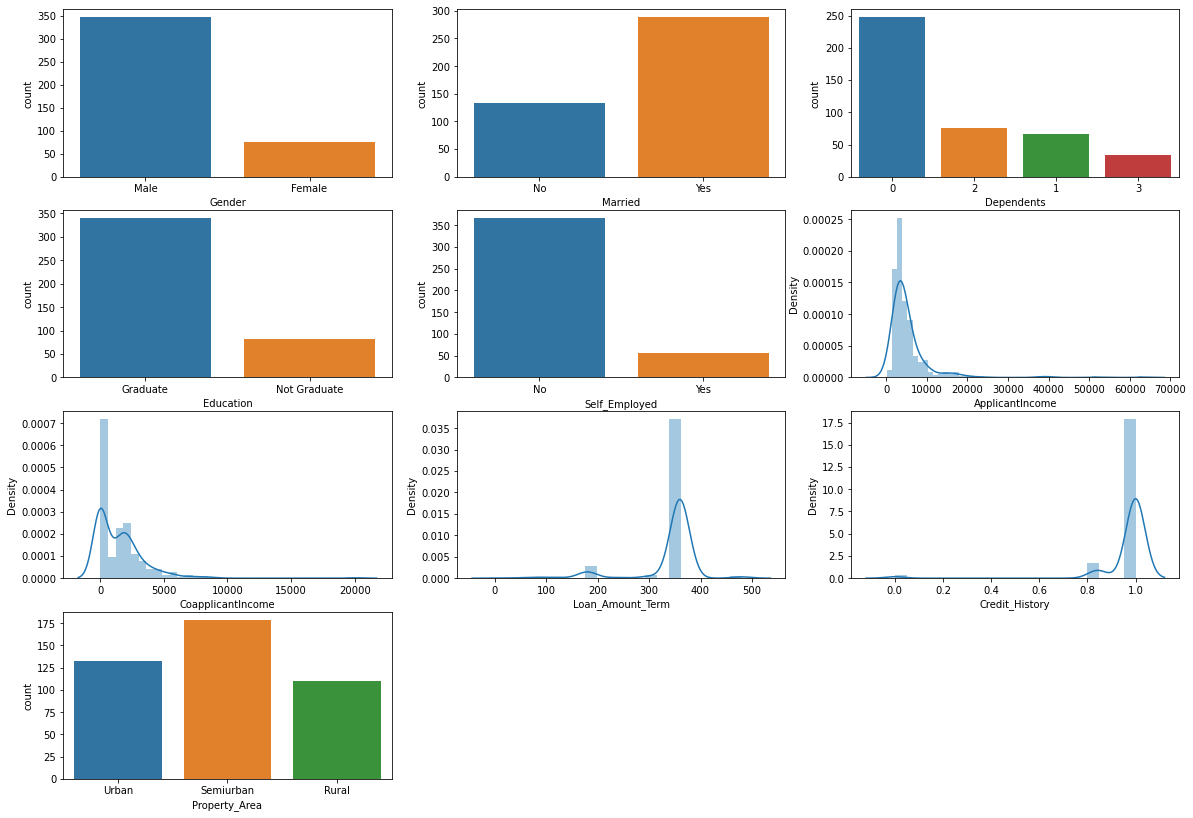

In [242]:
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.countplot(X[i])
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.distplot(X[i])
        q = q + 1


# 2)Bivariant

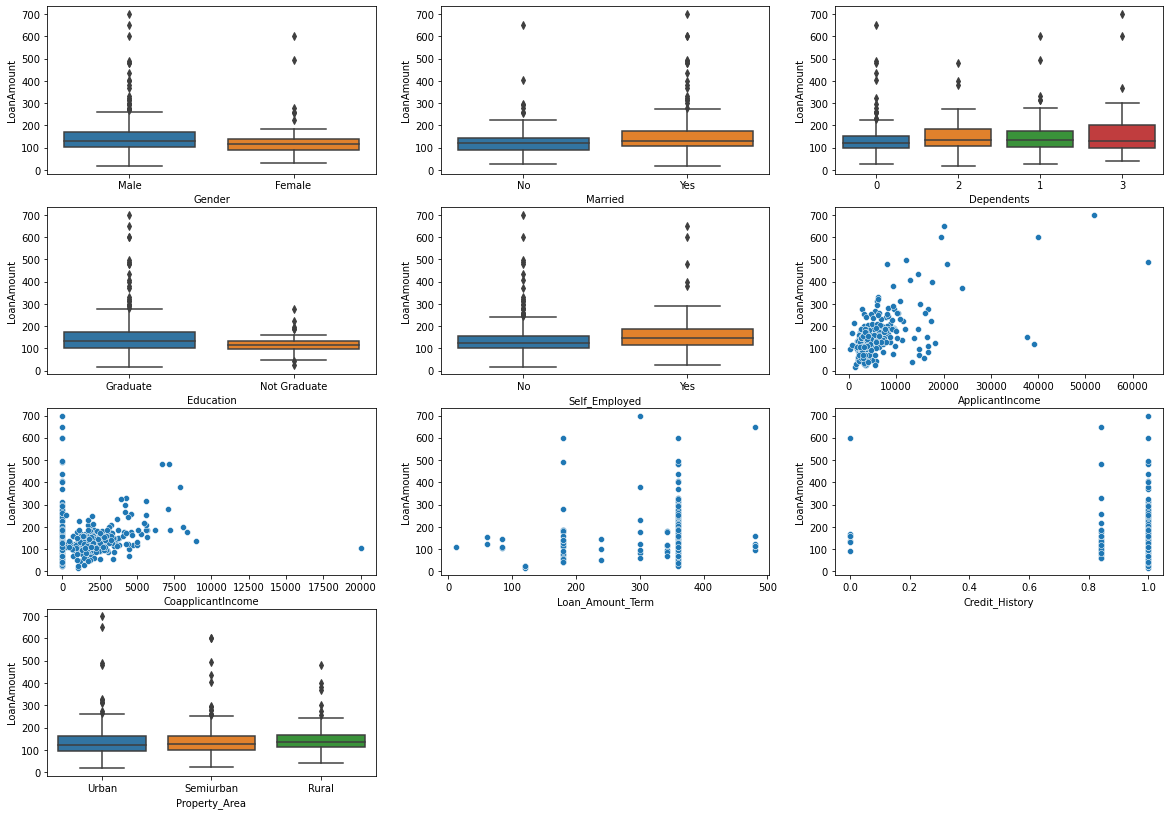

In [243]:
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.boxplot(X[i],Y.LoanAmount)
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.scatterplot(X[i],Y.LoanAmount)
        q = q + 1


# Data Preprocessing


In [244]:
cat, con = cat_con_sep(X)


In [245]:
X[con].skew()


ApplicantIncome      5.500304
CoapplicantIncome    3.042653
Loan_Amount_Term    -2.619580
Credit_History      -6.430558
dtype: float64

In [246]:
from numpy import log, sqrt
X.ApplicantIncome = log(X.ApplicantIncome)
X.CoapplicantIncome = sqrt(X.CoapplicantIncome)


In [247]:
X[con].skew()


ApplicantIncome      0.694509
CoapplicantIncome    0.351333
Loan_Amount_Term    -2.619580
Credit_History      -6.430558
dtype: float64

In [248]:
X = preprocessing_data(X,cat,con)


# Divide X and Y into training and testing data


In [249]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=32)


# Creating ML Models and choose one of the best
1) Multiple Linear Regressor Model

In [250]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm1_model = lm.fit(xtrain,ytrain)


# Calculating train and test error


In [252]:
from sklearn.metrics import mean_absolute_error

pred_tr_lm1model = lm1_model.predict(xtrain)
err_tr_lm1model = round(mean_absolute_error(ytrain,pred_tr_lm1model),4)
print("MLR Training MAE: ",err_tr_lm1model)

pred_ts_lm1model = lm1_model.predict(xtest)

err_ts_lm1model = round(mean_absolute_error(ytest,pred_ts_lm1model),4)
print("MLR Testing MAE: ",err_ts_lm1model)


MLR Training MAE:  39.6296
MLR Testing MAE:  36.9114


# Check collinearity


In [253]:
X.corr()


,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
ApplicantIncome,1.000000,-0.359967,-0.100766,-0.030626,-0.064333,0.064333,-0.026420,0.026420,-0.155161,0.064852,0.019814,0.168624,0.179037,-0.179037,-0.229608,0.229608,-0.020304,-0.010096,0.029926
CoapplicantIncome,-0.359967,1.000000,0.061589,-0.033723,-0.208240,0.208240,-0.243592,0.243592,0.040999,-0.040114,0.072589,-0.124854,0.000261,-0.000261,0.072563,-0.072563,0.088023,-0.014162,-0.068110
Loan_Amount_Term,-0.100766,0.061589,1.000000,0.069202,0.085819,-0.085819,0.104130,-0.104130,0.081389,-0.042534,-0.031030,-0.047392,0.040525,-0.040525,0.010387,-0.010387,0.043834,0.088347,-0.135402
Credit_History,-0.030626,-0.033723,0.069202,1.000000,-0.013747,0.013747,-0.013089,0.013089,0.026188,0.002985,0.016866,-0.076234,0.003735,-0.003735,-0.039577,0.039577,-0.009352,-0.010410,0.019911
Gender_Female,-0.064333,-0.208240,0.085819,-0.013747,1.000000,-1.000000,0.361989,-0.361989,0.152266,0.021676,-0.137232,-0.112321,0.008984,-0.008984,0.017406,-0.017406,-0.078364,0.127774,-0.061876
Gender_Male,0.064333,0.208240,-0.085819,0.013747,-1.000000,1.000000,-0.361989,0.361989,-0.152266,-0.021676,0.137232,0.112321,-0.008984,0.008984,-0.017406,0.017406,0.078364,-0.127774,0.061876
Married_No,-0.026420,-0.243592,0.104130,-0.013089,0.361989,-0.361989,1.000000,-1.000000,0.346842,-0.111515,-0.253452,-0.122834,-0.025243,0.025243,0.011734,-0.011734,0.035611,-0.008640,-0.024458
Married_Yes,0.026420,0.243592,-0.104130,0.013089,-0.361989,0.361989,-1.000000,1.000000,-0.346842,0.111515,0.253452,0.122834,0.025243,-0.025243,-0.011734,0.011734,-0.035611,0.008640,0.024458
Dependents_0,-0.155161,0.040999,0.081389,0.026188,0.152266,-0.152266,0.346842,-0.346842,1.000000,-0.511536,-0.556799,-0.346028,0.060723,-0.060723,0.067731,-0.067731,0.050576,0.021702,-0.070877
Dependents_1,0.064852,-0.040114,-0.042534,0.002985,0.021676,-0.021676,-0.111515,0.111515,-0.511536,1.000000,-0.201797,-0.125409,-0.019379,0.019379,-0.023878,0.023878,-0.121915,0.013263,0.101092


<AxesSubplot:>

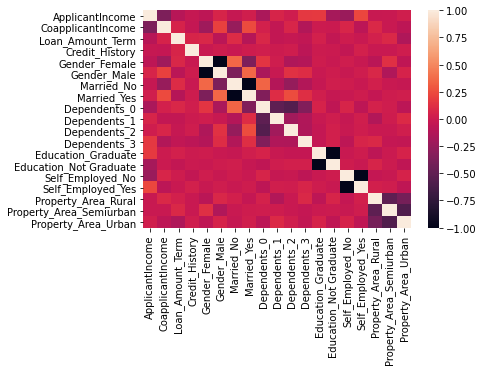

In [254]:
sb.heatmap(X.corr())


# 2)Ridge Model
Finding best value for alpha using GridSearchCV

In [255]:
from sklearn.linear_model import Ridge

w = []
q = 0.9
for i in range(0,20):
    q = q + 0.01
    w.append(q)
    
rr = Ridge()
tp = {"alpha":w}
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)


In [256]:
cvmodel.best_params_


{'alpha': 1.1}

# Creating Ridge Model


In [257]:
rr1 = Ridge(alpha=1.1)
model_rr1 = rr1.fit(xtrain,ytrain)


# Calculating train and test error


In [258]:
pred_tr_modelrr1 = model_rr1.predict(xtrain)
err_tr_modelrr1 = round(mean_absolute_error(ytrain,pred_tr_modelrr1),4)
print("Ridge Training MAE: ",err_tr_modelrr1)

pred_ts_modelrr1 = model_rr1.predict(xtest)
err_ts_modelrr1 = round(mean_absolute_error(ytest,pred_ts_modelrr1),4)
print("Ridge Testing MAE: ",err_ts_modelrr1)

Ridge Training MAE:  39.6014
Ridge Testing MAE:  36.804


# 3)Lasso Model
Finding best value for alpha using GridSearchCV

In [259]:
from sklearn.linear_model import Lasso

w = []
q = 0.9
for i in range(0,20):
    q = q + 0.01
    w.append(q)
    
la = Lasso()
tp = {"alpha":w}
cv = GridSearchCV(la,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 1.1}

# Creating Lasso Model


In [261]:
la1 = Lasso(alpha=1.1)
model_la1 = la1.fit(xtrain,ytrain)

# Calculating train and test error

In [262]:
pred_tr_modella1 = model_la1.predict(xtrain)
err_tr_modella1 = round(mean_absolute_error(ytrain,pred_tr_modella1),4)
print("Lasso Training MAE: ",err_tr_modella1)

pred_ts_modella1 = model_la1.predict(xtest)
err_ts_modella1 = round(mean_absolute_error(ytest,pred_ts_modella1),4)
print("Lasso Testing MAE: ",err_ts_modella1)

Lasso Training MAE:  39.1806
Lasso Testing MAE:  35.8647


# 4)Decision Tree Model

In [263]:
from sklearn.tree import DecisionTreeRegressor
dtr1  = DecisionTreeRegressor(random_state=21)
model_dtr1 = dtr1.fit(xtrain,ytrain)

# Calculating train and test error


In [264]:
pred_tr_modeldtr1 = model_dtr1.predict(xtrain)
err_tr_modeldtr1 = round(mean_absolute_error(ytrain,pred_tr_modeldtr1),4)
print("Decision Tree Training MAE: ",err_tr_modeldtr1)

pred_ts_modeldtr1 = model_dtr1.predict(xtest)
err_ts_modeldtr1 = round(mean_absolute_error(ytest,pred_ts_modeldtr1),4)
print("Decision Tree Testing MAE: ",err_ts_modeldtr1)

Decision Tree Training MAE:  0.0
Decision Tree Testing MAE:  50.3363


# 5)Random Forest Model
Finding best value for n Estimators, max depth using GridSearchCV

In [265]:
from sklearn.ensemble import RandomForestRegressor

tg = {"max_depth":range(2,15,1),"n_estimators":range(2,15,1)}
rfr = RandomForestRegressor(random_state=21)
cv = GridSearchCV(rfr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 4, 'n_estimators': 14}

# Creating Random Forest Model


In [266]:
rfo1 = RandomForestRegressor(n_estimators=14, random_state=21, max_depth=4)
model_rfr1 = rfo1.fit(xtrain,ytrain)

# Calculating train and test error


In [267]:
pred_tr_modelrfr1 = model_rfr1.predict(xtrain)
err_tr_modelrfr1 = round(mean_absolute_error(ytrain,pred_tr_modelrfr1),4)
print("Random Forest Training MAE: ",err_tr_modelrfr1)

pred_ts_modelrfr1 = model_rfr1.predict(xtest)
err_ts_modelrfr1 = round(mean_absolute_error(ytest,pred_ts_modelrfr1),4)
print("Random Forest Testing MAE: ",err_ts_modelrfr1)

Random Forest Training MAE:  31.6912
Random Forest Testing MAE:  32.9811


# 6)Adaboost Regression Model
Finding best value for n Estimators using GridSearchCV

In [268]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

tg = {"n_estimators":range(2,15,1)}
abm = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),random_state=21)
cv = GridSearchCV(abm,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_estimators': 4}

# Creating Adaboost Regression Model


In [269]:
boost1 = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),n_estimators=4,random_state=21)
model_adr1 = boost1.fit(xtrain,ytrain)


# Calculating train and test error


In [270]:
pred_tr_modeladr1 = model_adr1.predict(xtrain)
err_tr_modeladr1 = round(mean_absolute_error(ytrain,pred_tr_modeladr1),4)
print("Adaboost Regressor Training MAE: ",err_tr_modeladr1)

pred_ts_modeladr1 = model_adr1.predict(xtest)
err_ts_modeladr1 = round(mean_absolute_error(ytest,pred_ts_modeladr1),4)
print("Adaboost Regressor Testing MAE: ",err_ts_modeladr1)


Adaboost Regressor Training MAE:  42.8192
Adaboost Regressor Testing MAE:  33.1322


# 7)KNN Regression Model
Finding best value for n neighbors using GridSearchCV

In [271]:
from sklearn.neighbors import KNeighborsRegressor

tg = {"n_neighbors":range(2,15,1)}
knn = KNeighborsRegressor()
cv = GridSearchCV(knn,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_


{'n_neighbors': 12}

# Creating KNN Model


In [272]:
kn1 = KNeighborsRegressor(n_neighbors=12)
model_knnr1 = kn1.fit(xtrain,ytrain)


# Calculating train and test error


In [273]:
pred_tr_modelknnr1 = model_knnr1.predict(xtrain)
err_tr_modelknnr1 = round(mean_absolute_error(ytrain,pred_tr_modelknnr1),4)
print("KNN Regressor Training MAE: ",err_tr_modelknnr1)

pred_ts_modelknnr1 = model_knnr1.predict(xtest)
err_ts_modelknnr1 = round(mean_absolute_error(ytest,pred_ts_modelknnr1),4)
print("KNN Regressor Testing MAE: ",err_ts_modelknnr1)


KNN Regressor Training MAE:  40.0139
KNN Regressor Testing MAE:  33.6515


# Random Forest Model is the best among all models
Train Random Forest Model with overall trainning data

In [274]:
rfrm1 = RandomForestRegressor(n_estimators=14, random_state=21, max_depth=4)
model_rfr1_fin = rfrm1.fit(X,Y)


# Prepare testing data same as trainning data


In [276]:
test_data2 = B[B["Loan_Status"]=="N"]


# Indexing


In [277]:
len_test_data2 = test_data2.shape[0]
test_data2.index = range(0,len_test_data2,1)


# Remove Unwanted Columns


In [278]:
test_data2 = test_data2.drop(labels=["LoanAmount","Loan_Status"],axis=1)


# Data Preprocessing


In [280]:
cat, con = cat_con_sep(test_data2)


In [281]:
test_data2 = preprocessing_data(test_data2,cat,con)


# Predicting Loan Amount


In [283]:
predicted_LoanAmount = model_rfr1_fin.predict(test_data2)


In [284]:
pred_la = []
for i in predicted_LoanAmount:
    pred_la.append(round(i,2))

In [285]:
C = B[B["Loan_Status"]=="N"]
len_C = C.shape[0]
C.index = range(0,len_C,1)


In [286]:
C = C.drop(labels=["LoanAmount","Loan_Status"],axis=1)


In [287]:
C[["LoanAmount"]] = pred_la


In [288]:
C.head(3)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount
0,Male,Yes,2,Not Graduate,No,3881,0,360.0,0.0,Rural,110.45
1,Male,Yes,3,Graduate,No,3786,333,360.0,1.0,Semiurban,110.45
2,Male,Yes,1,Not Graduate,No,1888,1620,360.0,1.0,Urban,95.76


# b. If duration is less than equal to 20 years, is customer eligible for required amount for some longer duration? What is that duration?


In [289]:
train_data2 = A[(A["Loan_Status"]=="Y") & (A["Loan_Amount_Term"]>240.0)]


# Indexing


In [290]:
len_train_data2 = train_data2.shape[0]
train_data2.index = range(0,len_train_data2,1)


# Drop Unnecessary Columns


In [291]:
train_data2 = train_data2.drop(labels=["Loan_Status"],axis=1)


In [292]:
X = train_data2.drop(labels=["Loan_Amount_Term"],axis=1)
Y = train_data2[["Loan_Amount_Term"]]


# Convert Dependents columns into continuous


In [294]:
dep1 = []
for i in X.Dependents:
    dep1.append(int(i))

X[["Dependents"]] = dep1


In [295]:
loan_term = []
for i in Y.Loan_Amount_Term:
    loan_term.append(int(i))
    
Y["Loan_Amount_Term"] = loan_term


# EDA
1)Univariant


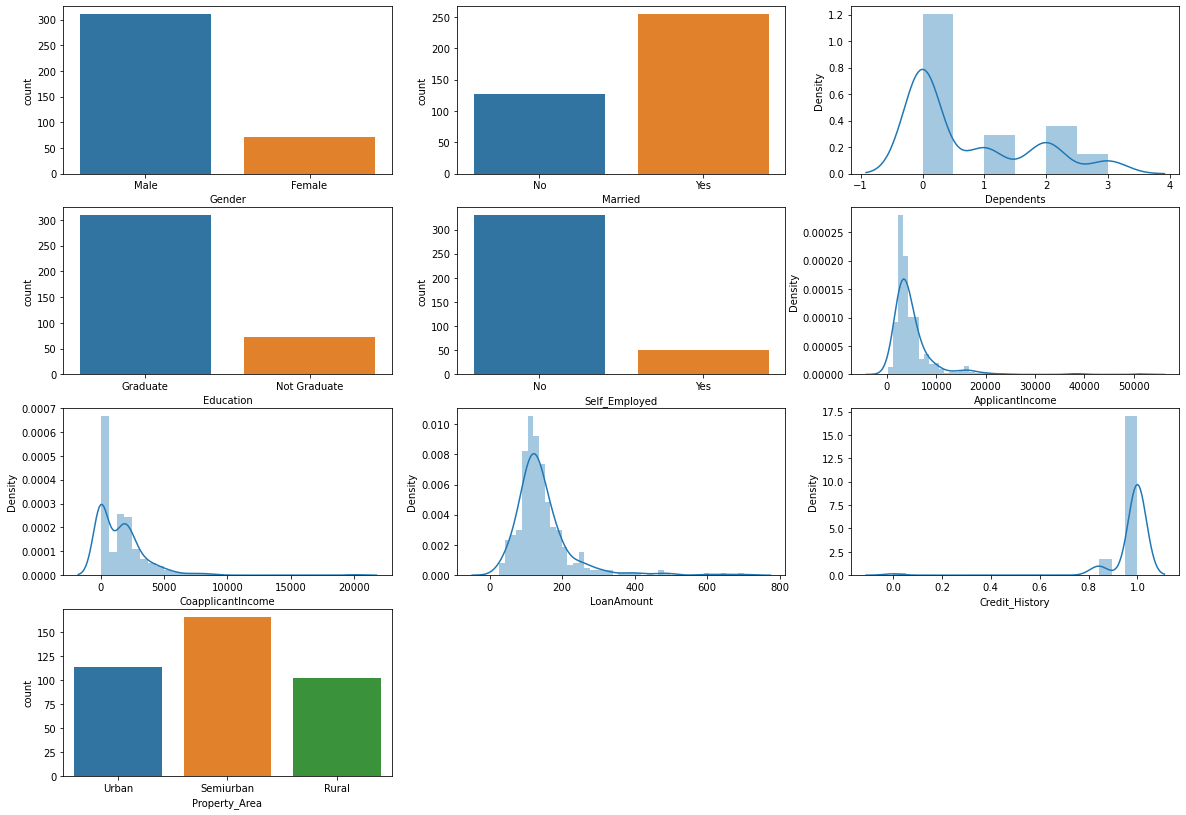

In [296]:
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.countplot(X[i])
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.distplot(X[i])
        q = q + 1

# 2)Bivariant


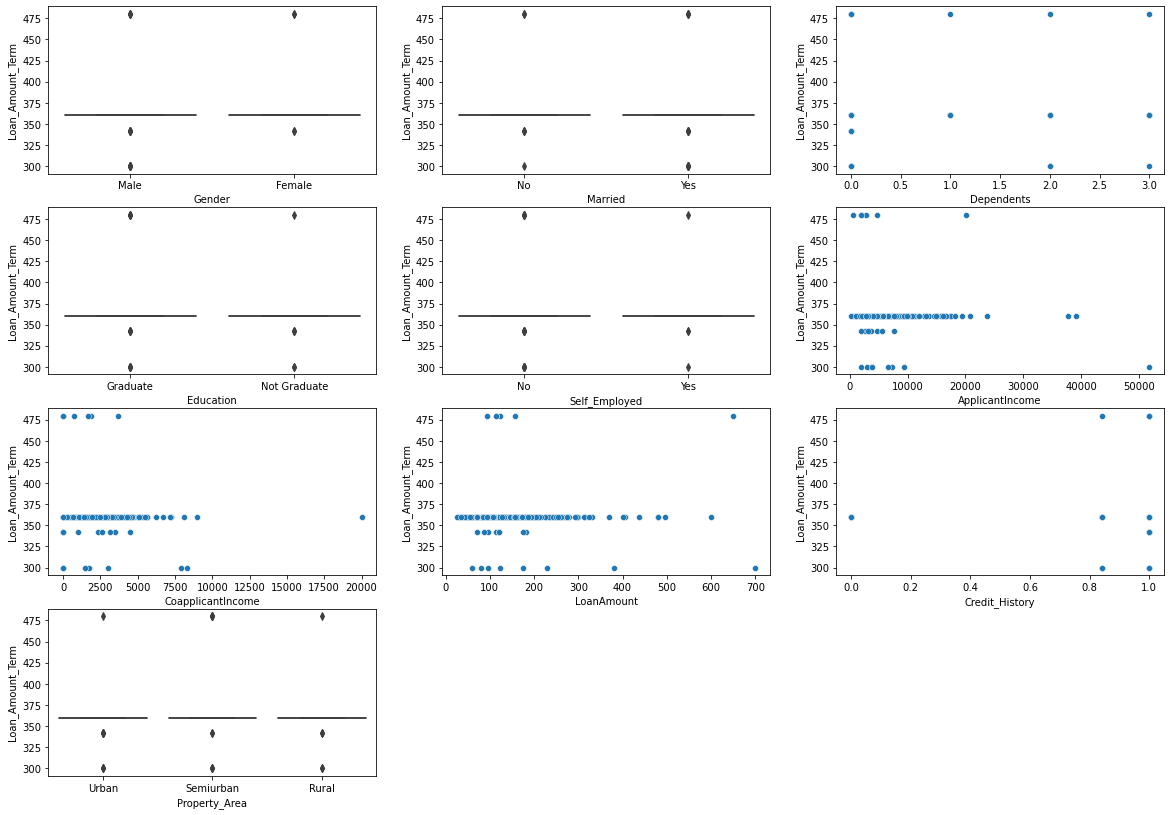

In [297]:
import matplotlib.pyplot as pt
pt.figure(figsize=(20,40))
q = 1
for i in X.columns:
    if X[i].dtype == "object":
        pt.subplot(11,3,q)
        sb.boxplot(X[i],Y.Loan_Amount_Term)
        q = q + 1
        
    else:
        pt.subplot(11,3,q)
        sb.scatterplot(X[i],Y.Loan_Amount_Term)
        q = q + 1


# Data Preprocessing


In [298]:
cat, con = cat_con_sep(X)


In [299]:
X[con].skew()


Dependents           1.018780
ApplicantIncome      4.759015
CoapplicantIncome    3.163921
LoanAmount           3.026629
Credit_History      -6.974311
dtype: float64

In [300]:
X.ApplicantIncome = log(X.ApplicantIncome)
X.CoapplicantIncome = sqrt(X.CoapplicantIncome)
X.LoanAmount = log(X.LoanAmount)
X.Dependents = sqrt(X.Dependents)

In [301]:
X[con].skew()


Dependents           0.608876
ApplicantIncome      0.532392
CoapplicantIncome    0.303109
LoanAmount           0.151097
Credit_History      -6.974311
dtype: float64

In [302]:
cat.remove("Property_Area")


In [303]:
cat

['Gender', 'Married', 'Education', 'Self_Employed']

In [304]:
lb1 = LabelEncoder()
ss1 = StandardScaler()
X1 = pd.DataFrame(lb1.fit_transform(X["Gender"]),columns=["Gender"])
X2 = pd.get_dummies(X["Property_Area"])
X3 = X1.join(X2)
X4 = pd.DataFrame(lb1.fit_transform(X["Married"]),columns=["Married"])
X5 = pd.DataFrame(lb1.fit_transform(X["Education"]),columns=["Education"])
X6 = X4.join(X5)
X7 = pd.DataFrame(lb1.fit_transform(X["Self_Employed"]),columns=["Self_Employed"])
X8 = X6.join(X7)
X9 = X8.join(X3)
X10 = pd.DataFrame(ss1.fit_transform(X[con]),columns=con)
X = X10.join(X9)


# Divide X and Y into training and testing


In [305]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=32)


# Creating ML Models and choose one of the best
1) Multiple Linear Regressor Model


In [306]:
lm2 = LinearRegression()
lm2_model = lm2.fit(xtrain,ytrain)


# Calculating tarin and test error

In [307]:
pred_tr_lm2model = lm2_model.predict(xtrain)
err_tr_lm2model = round(mean_absolute_error(ytrain,pred_tr_lm2model),4)
print("MLR Training MAE: ",err_tr_lm2model)

pred_ts_lm2model = lm2_model.predict(xtest)
err_ts_lm2model = round(mean_absolute_error(ytest,pred_ts_lm2model),4)
print("MLR Testing MAE: ",err_ts_lm2model)


MLR Training MAE:  7.0559
MLR Testing MAE:  5.6847


# Check Collinearity


In [308]:
X.corr()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed,Gender,Rural,Semiurban,Urban
Dependents,1.000000,0.176300,-0.046527,0.169421,-0.028107,0.348830,0.054317,0.076944,0.177344,-0.010752,-0.010796,0.022142
ApplicantIncome,0.176300,1.000000,-0.350550,0.496044,0.016361,-0.001328,-0.176204,0.247390,0.062626,-0.022151,-0.000099,0.021580
CoapplicantIncome,-0.046527,-0.350550,1.000000,0.133966,-0.043845,0.264678,-0.000562,-0.064459,0.235373,0.104411,-0.038713,-0.059188
LoanAmount,0.169421,0.496044,0.133966,1.000000,-0.042119,0.205778,-0.156998,0.159810,0.177050,0.089795,-0.025874,-0.058957
Credit_History,-0.028107,0.016361,-0.043845,-0.042119,1.000000,0.037194,-0.025598,0.038172,0.036054,0.017400,-0.009624,-0.006420
Married,0.348830,-0.001328,0.264678,0.205778,0.037194,1.000000,-0.014222,0.016352,0.376532,-0.050300,0.014972,0.032506
Education,0.054317,-0.176204,-0.000562,-0.156998,-0.025598,-0.014222,1.000000,-0.012558,-0.010032,0.101820,-0.005004,-0.093270
Self_Employed,0.076944,0.247390,-0.064459,0.159810,0.038172,0.016352,-0.012558,1.000000,0.009976,0.040850,0.012118,-0.052755
Gender,0.177344,0.062626,0.235373,0.177050,0.036054,0.376532,-0.010032,0.009976,1.000000,0.076237,-0.109643,0.045124
Rural,-0.010752,-0.022151,0.104411,0.089795,0.017400,-0.050300,0.101820,0.040850,0.076237,1.000000,-0.531291,-0.392618


<AxesSubplot:>

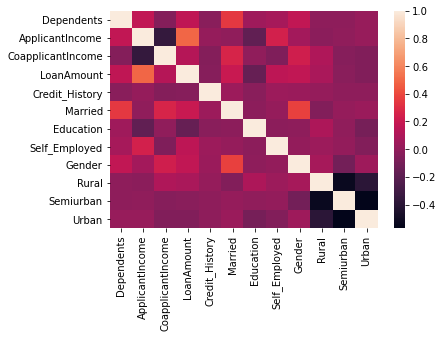

In [309]:
sb.heatmap(X.corr())


# 2)Ridge Model
Finding best alpha value using GridSearchCV

In [310]:
w = []
q = 0.9
for i in range(0,20):
    q = q + 0.01
    w.append(q)
    
rr = Ridge()
tp = {"alpha":w}
cv = GridSearchCV(rr,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_


{'alpha': 1.1}

# Creating Ridge Model


In [311]:
rr2 = Ridge(alpha=1.1)
model_rr2 = rr2.fit(xtrain,ytrain)


# Calculating train and test error


In [312]:
pred_tr_modelrr2 = model_rr2.predict(xtrain)
err_tr_modelrr2 = round(mean_absolute_error(ytrain,pred_tr_modelrr2),4)
print("Ridge Training MAE: ",err_tr_modelrr2)

pred_ts_modelrr2 = model_rr2.predict(xtest)
err_ts_modelrr2 = round(mean_absolute_error(ytest,pred_ts_modelrr2),4)
print("Ridge Testing MAE: ",err_ts_modelrr2)


Ridge Training MAE:  7.0177
Ridge Testing MAE:  5.6351


# 3)Lasso Model
Finding best alpha value using GridSearchCV

In [314]:
w = []
q = 0.9
for i in range(0,20):
    q = q + 0.01
    w.append(q)
    
la = Lasso()
tp = {"alpha":w}
cv = GridSearchCV(la,tp,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_


{'alpha': 1.1}

# Creating Lasso Model


In [315]:
la2 = Lasso(alpha=1.1)
model_la2 = la2.fit(xtrain,ytrain)


# Predicting train and test error


In [316]:
pred_tr_modella2 = model_la2.predict(xtrain)
err_tr_modella2 = round(mean_absolute_error(ytrain,pred_tr_modella2),4)
print("Lasso Training MAE: ",err_tr_modella1)

pred_ts_modella2 = model_la2.predict(xtest)
err_ts_modella2 = round(mean_absolute_error(ytest,pred_ts_modella2),4)
print("Lasso Testing MAE: ",err_ts_modella2)


Lasso Training MAE:  39.1806
Lasso Testing MAE:  2.3311


# 4)Decision Tree Model


In [317]:
dtr2  = DecisionTreeRegressor(random_state=21)
model_dtr2 = dtr2.fit(xtrain,ytrain)


# Calculating train and test error


In [318]:
pred_tr_modeldtr2 = model_dtr2.predict(xtrain)
err_tr_modeldtr2 = round(mean_absolute_error(ytrain,pred_tr_modeldtr2),4)
print("Decision Tree Training MAE: ",err_tr_modeldtr2)

pred_ts_modeldtr2 = model_dtr2.predict(xtest)
err_ts_modeldtr2 = round(mean_absolute_error(ytest,pred_ts_modeldtr2),4)
print("Decision Tree Testing MAE: ",err_ts_modeldtr2)


Decision Tree Training MAE:  0.0
Decision Tree Testing MAE:  7.2468


# 5)Random Forest Model
Finding best value for n Estimators, max depth using GridSearchCV

In [319]:
tg = {"max_depth":range(2,15,1),"n_estimators":range(2,15,1)}
rfr = RandomForestRegressor(random_state=21)
cv = GridSearchCV(rfr,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'max_depth': 2, 'n_estimators': 8}

# Creating Random Forest Model


In [320]:
rfo2 = RandomForestRegressor(n_estimators=8, random_state=21, max_depth=2)
model_rfr2 = rfo2.fit(xtrain,ytrain)


# Calculating train and test error


In [321]:
pred_tr_modelrfr2 = model_rfr2.predict(xtrain)
err_tr_modelrfr2 = round(mean_absolute_error(ytrain,pred_tr_modelrfr2),4)
print("Random Forest Training MAE: ",err_tr_modelrfr2)

pred_ts_modelrfr2 = model_rfr2.predict(xtest)
err_ts_modelrfr2 = round(mean_absolute_error(ytest,pred_ts_modelrfr2),4)
print("Random Forest Testing MAE: ",err_ts_modelrfr2)


Random Forest Training MAE:  3.8898
Random Forest Testing MAE:  4.1571


# 6)Adaboost Regression Model
Finding best value for n Estimators using GridSearchCV

In [322]:
tg = {"n_estimators":range(2,15,1)}
abm = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),random_state=21)
cv = GridSearchCV(abm,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_


{'n_estimators': 2}

# Creating Adaboost Regression


In [324]:
boost2 = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),n_estimators=2,random_state=21)
model_adr2 = boost2.fit(xtrain,ytrain)


# Calculating train and test error


In [325]:
pred_tr_modeladr2 = model_adr2.predict(xtrain)
err_tr_modeladr2 = round(mean_absolute_error(ytrain,pred_tr_modeladr2),4)
print("Adaboost Regressor Training MAE: ",err_tr_modeladr2)

pred_ts_modeladr2 = model_adr2.predict(xtest)
err_ts_modeladr2 = round(mean_absolute_error(ytest,pred_ts_modeladr2),4)
print("Adaboost Regressor Testing MAE: ",err_ts_modeladr2)


Adaboost Regressor Training MAE:  4.212
Adaboost Regressor Testing MAE:  3.1747


# 7)KNN Regression Model
Finding best value n neighbors using GridSearchCV


In [326]:
tg = {"n_neighbors":range(2,15,1)}
knn = KNeighborsRegressor()
cv = GridSearchCV(knn,tg,scoring="neg_mean_absolute_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_


{'n_neighbors': 7}

# Making of KNN model


In [327]:
kn2 = KNeighborsRegressor(n_neighbors=10)
model_knnr2 = kn2.fit(xtrain,ytrain)


# Calculating train and test error


In [328]:
pred_tr_modelknnr2 = model_knnr2.predict(xtrain)
err_tr_modelknnr2 = round(mean_absolute_error(ytrain,pred_tr_modelknnr2),4)
print("KNN Regressor Training MAE: ",err_tr_modelknnr2)

pred_ts_modelknnr2 = model_knnr2.predict(xtest)
err_ts_modelknnr2 = round(mean_absolute_error(ytest,pred_ts_modelknnr2),4)
print("KNN Regressor Testing MAE: ",err_ts_modelknnr2)


KNN Regressor Training MAE:  6.1184
KNN Regressor Testing MAE:  4.1143


# Adaboost Regression Model is best model as compared to others
Train Adaboost Regression Model with overall trainning data


In [329]:
booster = AdaBoostRegressor(DecisionTreeRegressor(random_state=21,max_depth=2),n_estimators=2,random_state=21)
model_adr2_fin = booster.fit(X,Y)


# Prepare testing data same as trainning data


In [330]:
test_data3 = B[(B["Loan_Status"]=="N") & (B["Loan_Amount_Term"]<=240)]


# Indexing

In [332]:
len_test_data3 = test_data3.shape[0]
test_data3.index = range(0,len_test_data3,1)


# Delete Unwanted Columns


In [333]:
test_data3 = test_data3.drop(labels=["Loan_Status","Loan_Amount_Term"],axis=1)


# Convert Dependents columns type into continuous


In [334]:
test_dep = []
for i in test_data3.Dependents:
    test_dep.append(int(i))
    
test_data3["Dependents"] = test_dep


# Data Preprocessing


In [335]:
cat, con = cat_con_sep(test_data3)


In [336]:
cat.remove("Property_Area")
cat


['Gender', 'Married', 'Education', 'Self_Employed']

In [337]:
input1 = pd.get_dummies(test_data3["Property_Area"])
input2 = pd.DataFrame(lb1.fit_transform(test_data3["Gender"]),columns=["Gender"])
out1 = input2.join(input1)
input3 = pd.DataFrame(lb1.fit_transform(test_data3["Self_Employed"]),columns=["Self_Employed"])
input4 = pd.DataFrame(lb1.fit_transform(test_data3["Education"]),columns=["Education"])
out2 = input4.join(input3)
input5 = pd.DataFrame(lb1.fit_transform(test_data3["Married"]),columns=["Married"])
out3 = input5.join(out2)
out4 = out3.join(out1)

x_con = pd.DataFrame(ss1.fit_transform(test_data3[con]),columns=con)

test_data3 = x_con.join(out4)


In [338]:
test_data3


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Married,Education,Self_Employed,Gender,Rural,Semiurban,Urban
0,1.543487,-0.757813,-1.166422,-1.262291,0.5,0,1,0,0,0,0,1
1,0.685994,1.966320,1.231289,1.786627,0.5,1,0,0,1,0,0,1
2,-1.028992,-0.245777,-1.166422,-0.446657,0.5,0,0,0,1,0,0,1
3,-1.028992,-0.348184,0.271372,0.038840,-2.0,0,0,0,1,0,1,0
4,-0.171499,-0.614546,0.830183,-0.116519,0.5,1,0,1,1,1,0,0


# Predicting Loan Amount Term


In [339]:
pred_loan_amount_term = model_adr2_fin.predict(test_data3)


In [340]:
la_term = []
for i in pred_loan_amount_term:
    la_term.append(round(i))


In [341]:
la_term

[360, 360, 360, 352, 360]

In [342]:
D = B[(B["Loan_Status"]=="N") & (B["Loan_Amount_Term"]<=240)]


In [343]:
len_D = D.shape[0]
D.index = range(0,len_D,1)


In [344]:
D = D.drop(labels=["Loan_Amount_Term","Loan_Status"],axis=1)


In [345]:
D["Loan_Amount_Term"] = la_term


In [349]:
D

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Amount_Term
0,Female,No,3,Not Graduate,No,2083,0,28.0,1.0,Urban,360
1,Male,Yes,2,Graduate,No,7350,4029,185.0,1.0,Urban,360
2,Male,No,0,Graduate,No,3073,0,70.0,1.0,Urban,360
3,Male,No,0,Graduate,No,2875,2416,95.0,0.0,Semiurban,352
4,Male,Yes,1,Graduate,Yes,2360,3355,87.0,1.0,Rural,360
